In [51]:
import pandas as pd
import numpy as np

import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
#!pip install seaborn --upgrade

In [3]:
sbn.__version__

'0.11.2'

# Data

In [4]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(filepath_or_buffer=path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [23]:
cols = df.columns.str.replace("-", "_")
df.columns = cols

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num_of_doors       201 non-null    object 
 5   body_style         201 non-null    object 
 6   drive_wheels       201 non-null    object 
 7   engine_location    201 non-null    object 
 8   wheel_base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb_weight        201 non-null    int64  
 13  engine_type        201 non-null    object 
 14  num_of_cylinders   201 non-null    object 
 15  engine_size        201 non-null    int64  
 16  fuel_system        201 non

In [25]:
df.isna().sum()

symboling            0
normalized_losses    0
make                 0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               4
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
city_L/100km         0
horsepower_binned    1
diesel               0
gas                  0
dtype: int64

# Analizing the data 

### with df.describe() 

In [26]:
#We can analyce the numeric data with the method df.describe()
df.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,city_L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


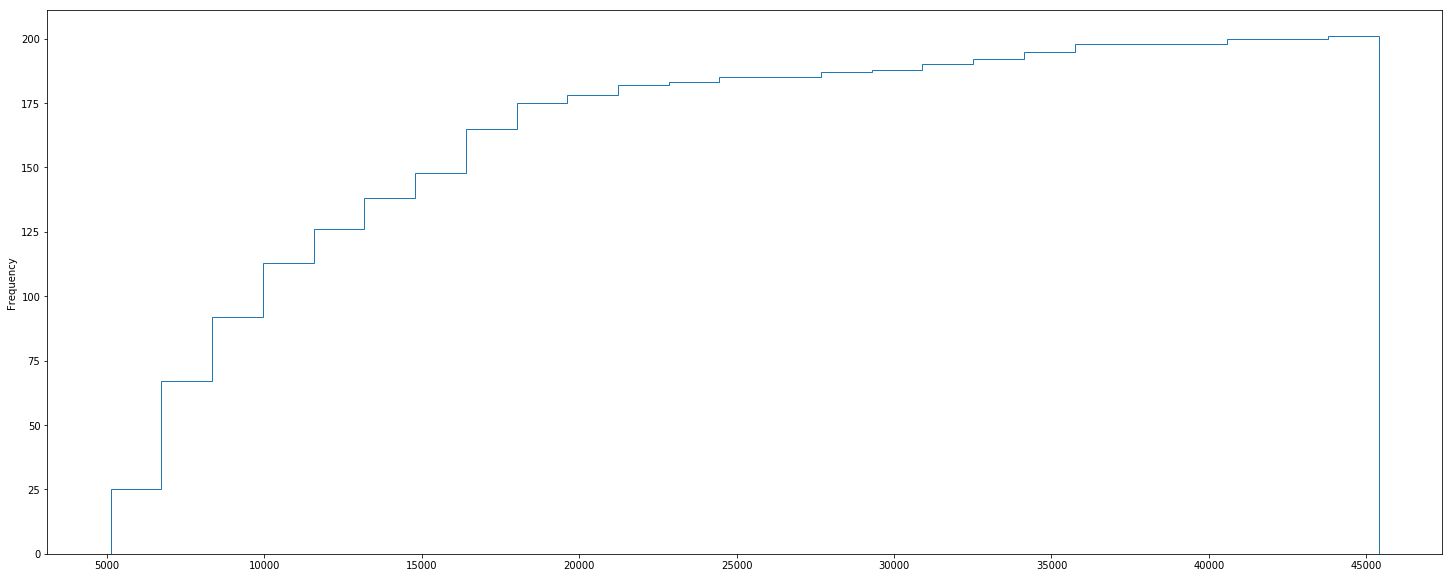

In [27]:
#we can use plots like histograms to see better the data
df.price.plot(kind="hist", histtype="step", cumulative=True, bins=25, figsize=(25,10))

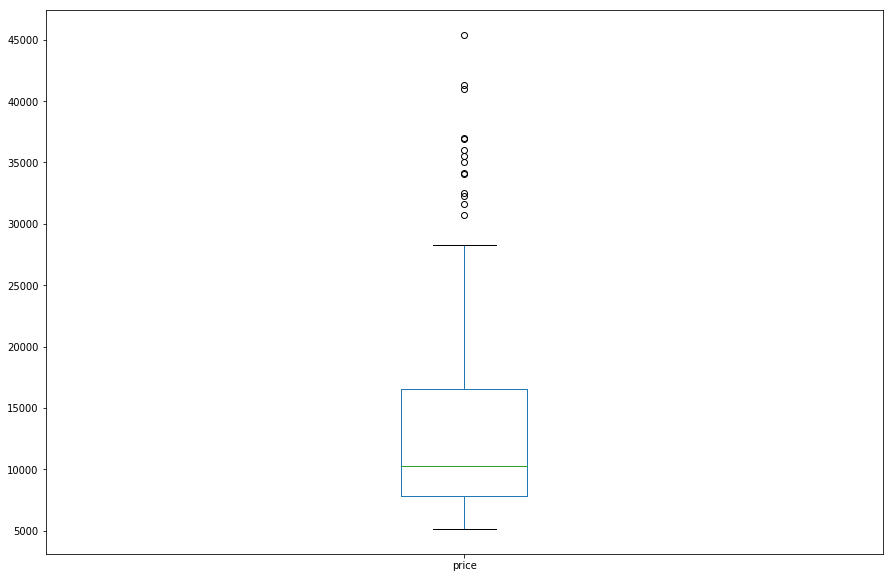

In [28]:
#or we can use box plots
df.price.plot(kind="box", figsize=(15, 10))

### with df.value_counts()

In [83]:
#to study the categorical varibles we can use the method df.value_counts()
df.drive_wheels.value_counts()

fwd    118
rwd     75
4wd      8
Name: drive_wheels, dtype: int64

In [34]:
#or (and I think is sometimes better) we can use the method df.describe() with the argument include=object
df.describe(include=object)

,make,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system,horsepower_binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


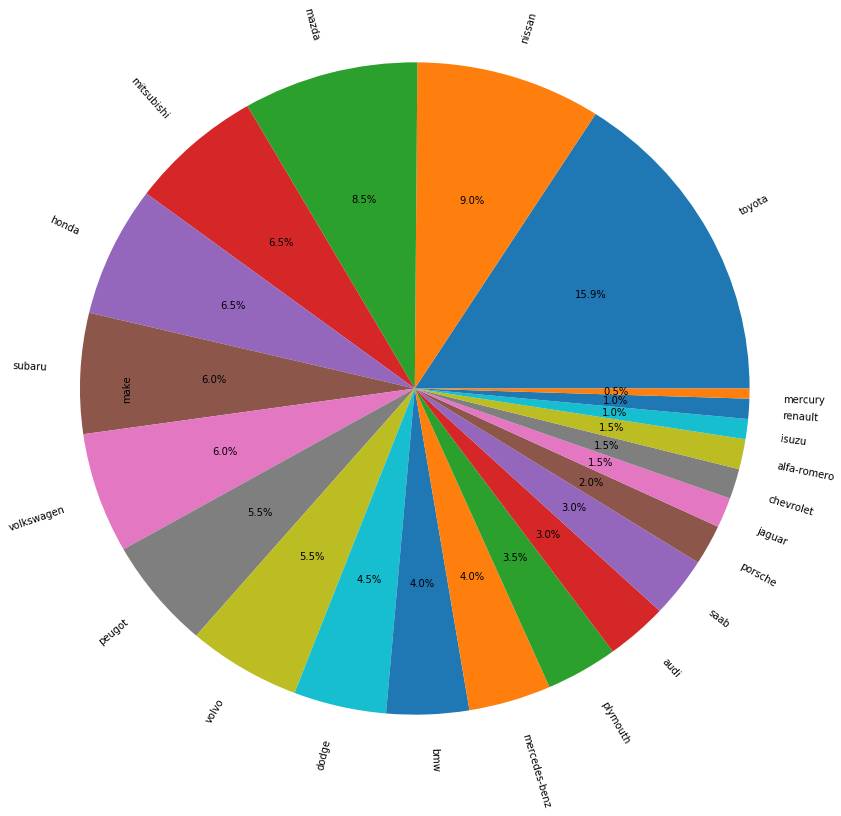

In [49]:
#and for categorical variables it is a good idea to use pie plots
df.make.value_counts().plot(kind="pie", autopct='%1.1f%%', radius=1.5, rotatelabels=True, figsize=(10,10))

In [39]:
#value counts also show us info for the numerical variables
df.price.value_counts()

8495.0     2
18150.0    2
7295.0     2
6229.0     2
8845.0     2
          ..
15580.0    1
6377.0     1
30760.0    1
16925.0    1
18920.0    1
Name: price, Length: 186, dtype: int64

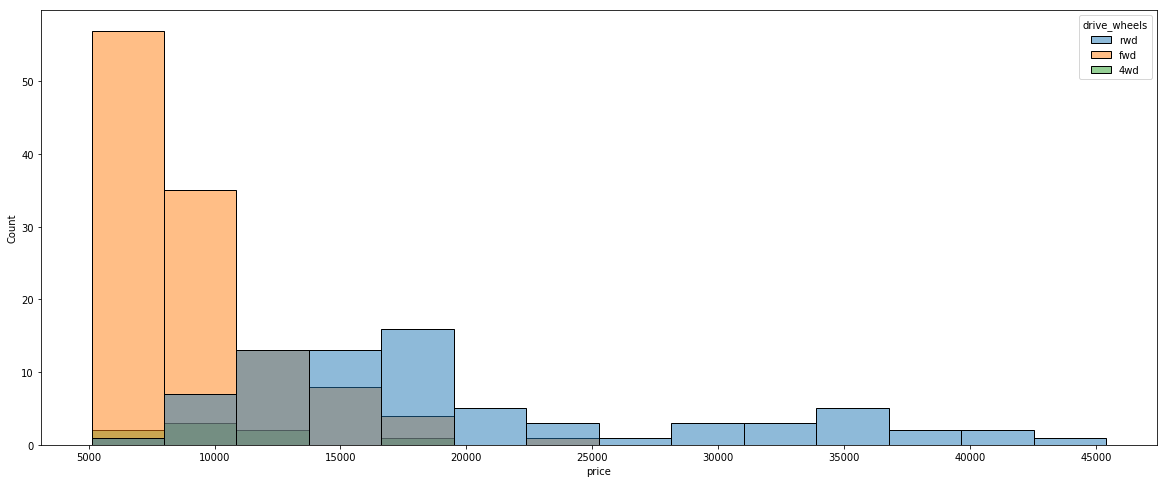

In [88]:
#We can also make neat hitogram plot by using seaborn:
fig, ax = plt.subplots(figsize=(20,8))
sbn.histplot(data=df, x="price", hue="drive_wheels", bins=int(np.sqrt(df.shape[0])), ax=ax)

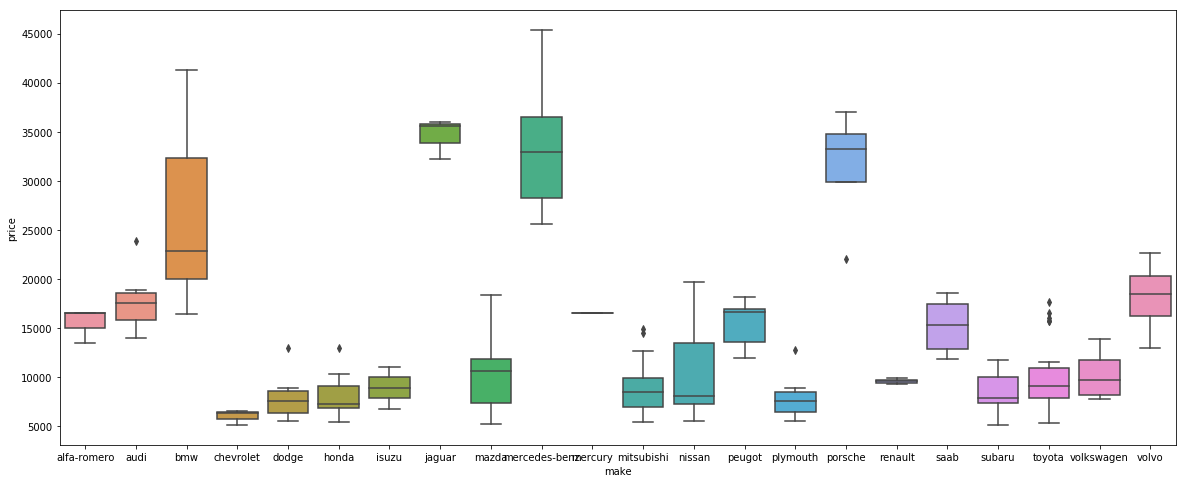

In [114]:
#or with box plots
fig, ax = plt.subplots(figsize=(20,8))
sbn.boxplot(data=df, x="make", y="price")

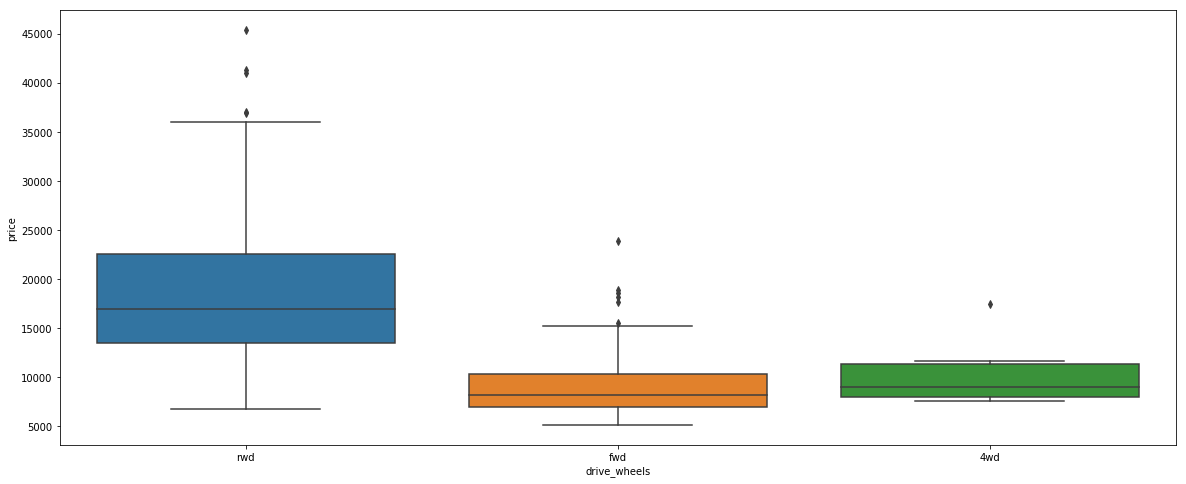

In [103]:
fig, ax = plt.subplots(figsize=(20,8))
sbn.boxplot(data=df, x="drive_wheels", y="price")

from the last two boxplots we can conclude that none of those is a good target (predictor) for the price since
the prices are spreaded almost all around for wheter the "drive wheels" or the "make" targets. 
If we try to plot a tend line it would be almost horizontal. 

The "engine location" would work better:

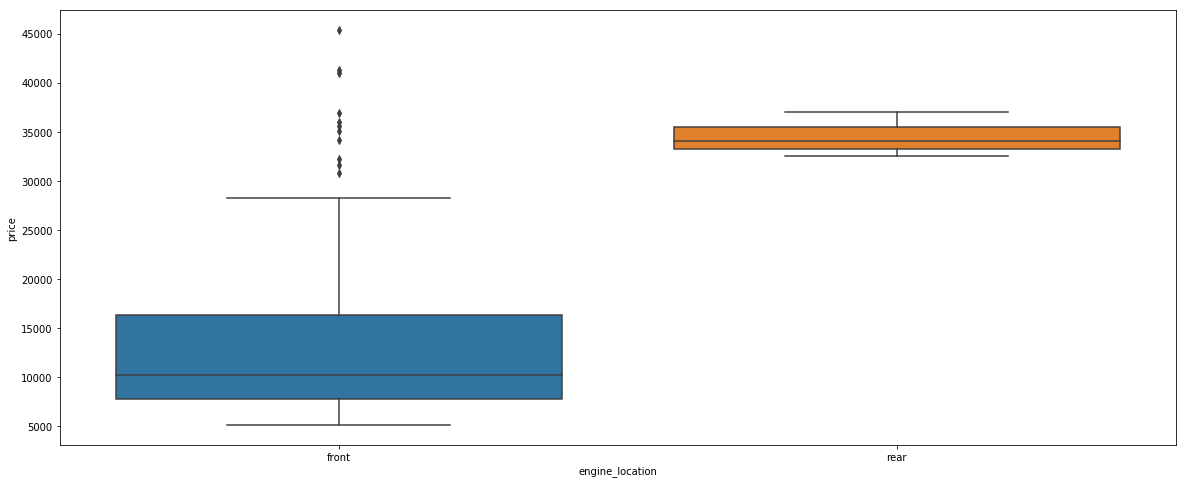

In [120]:
fig, ax = plt.subplots(figsize=(20,8))
sbn.boxplot(data=df, x="engine_location", y="price")

In [115]:
#if we want to see some statistical information of the boxplot:
#the median
df.groupby(by="drive_wheels").median()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,city_L/100km,diesel,gas
drive_wheels,,,,,,,,,,,,,,,,,,,
4wd,0.0,88.0,96.9,0.826526,0.908333,54.9,2465.0,108.0,3.62,2.64,8.85,82.0,4800.0,24.0,29.0,9005.5,9.791667,0.0,1.0
fwd,1.0,115.0,96.1,0.821480,0.901389,53.7,2262.5,108.0,3.17,3.39,9.00,83.0,5200.0,27.5,34.0,8192.0,8.548280,0.0,1.0
rwd,0.0,122.0,103.5,0.897165,0.933333,54.3,3020.0,146.0,3.58,3.21,9.20,120.0,5000.0,19.0,25.0,16900.0,12.368421,0.0,1.0


In [116]:
#the quatiles
df.groupby(by="drive_wheels").quantile(q=0.25)

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,city_L/100km,diesel,gas
drive_wheels,,,,,,,,,,,,,,,,,,,
4wd,0.0,84.5,95.70,0.815473,0.885417,54.3,2361.25,104.00,3.155,2.640,7.925,70.25,4800.0,23.0,24.5,7984.25,8.954772,0.0,1.0
fwd,0.0,94.0,94.50,0.764536,0.886111,51.6,2005.00,93.25,3.030,3.150,8.625,68.00,4800.0,24.0,30.0,6950.75,7.580645,0.0,1.0
rwd,0.0,122.0,95.95,0.830851,0.911111,52.0,2705.00,130.00,3.430,3.115,8.400,101.00,4775.0,17.0,24.0,13455.00,9.791667,0.0,1.0


In [117]:
df.groupby(by="drive_wheels").quantile(q=0.75)

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,city_L/100km,diesel,gas
drive_wheels,,,,,,,,,,,,,,,,,,,
4wd,0.5,102.0,97.000,0.834214,0.908333,56.55,2693.50,108.0,3.62,3.03,9.0,111.0,4800.0,26.25,31.25,11367.75,10.217391,0.0,1.0
fwd,2.0,128.0,98.425,0.843585,0.920833,55.10,2422.25,121.0,3.35,3.41,9.4,100.0,5500.0,31.00,38.00,10332.50,9.791667,0.0,1.0
rwd,2.0,161.0,107.950,0.907256,0.950000,56.25,3230.00,181.0,3.70,3.50,9.5,160.0,5400.0,24.00,28.00,22547.50,13.823529,0.0,1.0


In [132]:
group = df.groupby(by="drive_wheels")
group.groups.keys()

dict_keys(['4wd', 'fwd', 'rwd'])

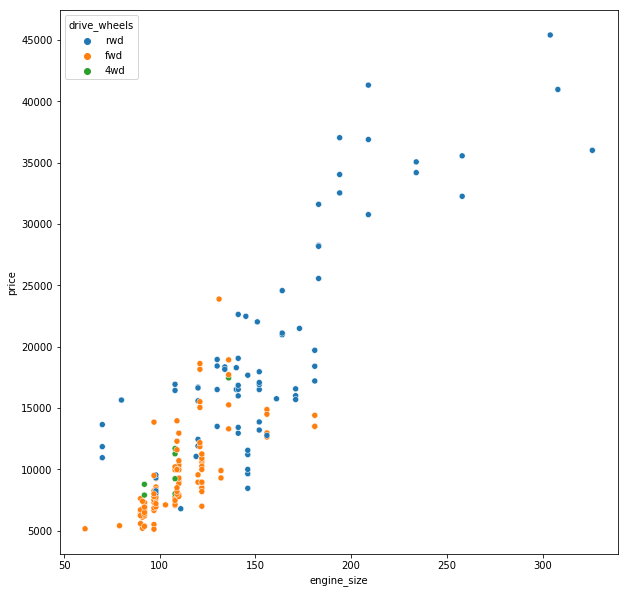

In [141]:
#we can also use scatter plots to see if a target(y) can be predicted from a given variable(x)
#For instance, lets see if it is a relationship between the price and the engine_size
fig, ax = plt.subplots(figsize=(10,10))
sbn.scatterplot(data=df, x="engine_size", y="price", hue="drive_wheels", ax=ax)

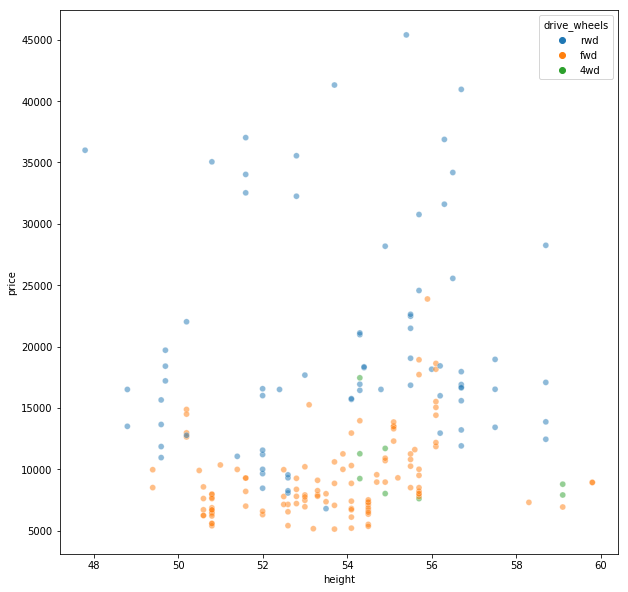

In [142]:
#this plot show us a good level of correlation between the variables engine_size and price.
#but, for intance, the height of the car is not a good predictor for its price.
fig, ax = plt.subplots(figsize=(10,10))
sbn.scatterplot(data=df, x="height", y="price", hue="drive_wheels", alpha=0.5,  ax=ax)